Instance segmentation example:

In [1]:
import requests
import torch
from PIL import Image
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation


# load Mask2Former fine-tuned on Cityscapes semantic segmentation
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-cityscapes-semantic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-cityscapes-semantic")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

# model predicts class_queries_logits of shape `(batch_size, num_queries)`
# and masks_queries_logits of shape `(batch_size, num_queries, height, width)`
class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

# you can pass them to processor for postprocessing
predicted_semantic_map = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
# we refer to the demo notebooks for visualization (see "Resources" section in the Mask2Former docs)

2024-02-12 14:19:45.204993: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 14:19:45.205065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 14:19:45.211662: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 14:19:45.268025: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-12 14:19:48.237238: W tensorflow/compiler/tf2

preprocessor_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/866M [00:00<?, ?B/s]

In [2]:
predicted_semantic_map

tensor([[2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        ...,
        [2, 2, 2,  ..., 8, 8, 8],
        [2, 2, 2,  ..., 8, 8, 8],
        [2, 2, 2,  ..., 8, 8, 8]])

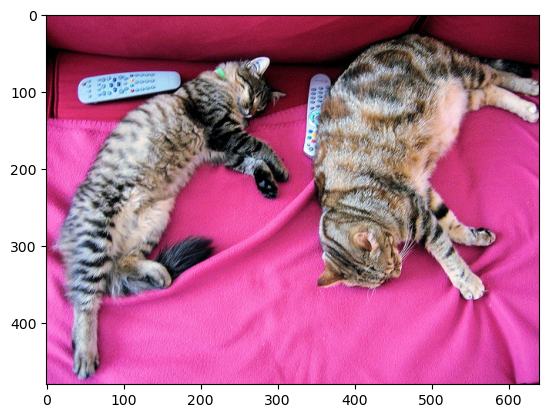

In [16]:
import matplotlib.pyplot as plt 

plt.imshow(image)

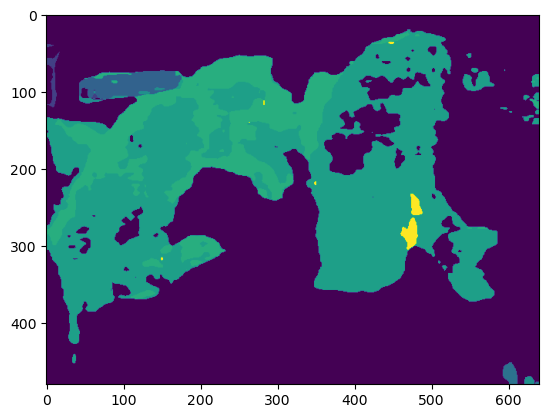

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(predicted_semantic_map)

Semantic segmentation example:

In [34]:
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation
from PIL import Image
import requests
import torch

# Load Mask2Former trained on ADE20k semantic segmentation dataset
image_processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-small-ade-semantic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-small-ade-semantic")

url = (
    "https://huggingface.co/datasets/hf-internal-testing/fixtures_ade20k/resolve/main/ADE_val_00000001.jpg"
)
image = Image.open(requests.get(url, stream=True).raw)
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

# Model predicts class_queries_logits of shape `(batch_size, num_queries)`
# and masks_queries_logits of shape `(batch_size, num_queries, height, width)`
class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

# Perform post-processing to get semantic segmentation map
pred_semantic_map = image_processor.post_process_semantic_segmentation(
    outputs, target_sizes=[image.size[::-1]]
)[0]
print(pred_semantic_map.shape)

torch.Size([512, 683])


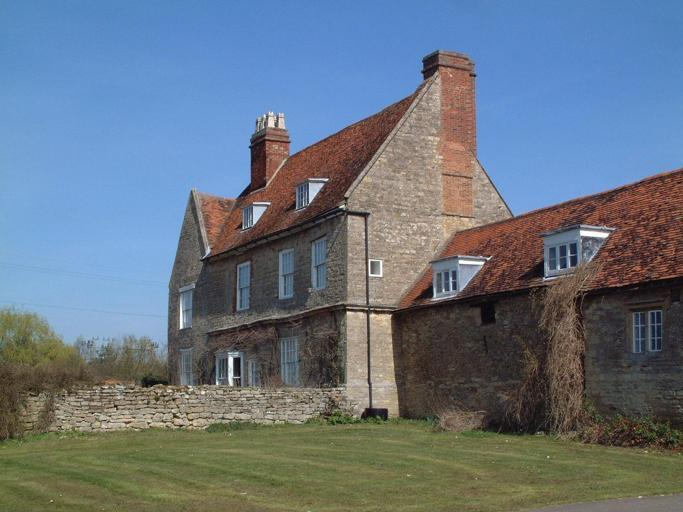

In [36]:
image

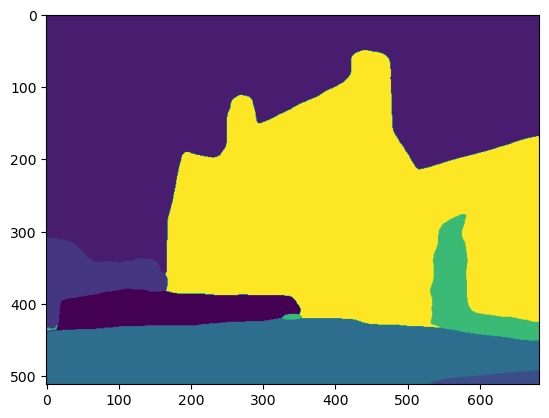

In [37]:
plt.imshow(pred_semantic_map)

Panoptic segmentation example:

In [38]:
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation
from PIL import Image
import requests
import torch

# Load Mask2Former trained on CityScapes panoptic segmentation dataset
image_processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-small-cityscapes-panoptic")
model = Mask2FormerForUniversalSegmentation.from_pretrained(
    "facebook/mask2former-swin-small-cityscapes-panoptic"
)

url = "https://cdn-media.huggingface.co/Inference-API/Sample-results-on-the-Cityscapes-dataset-The-above-images-show-how-our-method-can-handle.png"
image = Image.open(requests.get(url, stream=True).raw)
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

# Model predicts class_queries_logits of shape `(batch_size, num_queries)`
# and masks_queries_logits of shape `(batch_size, num_queries, height, width)`
class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

# Perform post-processing to get panoptic segmentation map
pred_panoptic_map = image_processor.post_process_panoptic_segmentation(
    outputs, target_sizes=[image.size[::-1]]
)[0]["segmentation"]
print(pred_panoptic_map.shape)

`label_ids_to_fuse` unset. No instance will be fused.


torch.Size([338, 676])


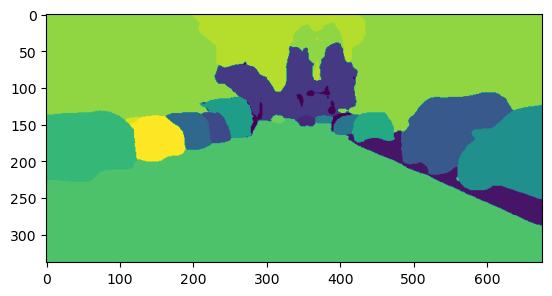

In [39]:
plt.imshow(pred_panoptic_map)

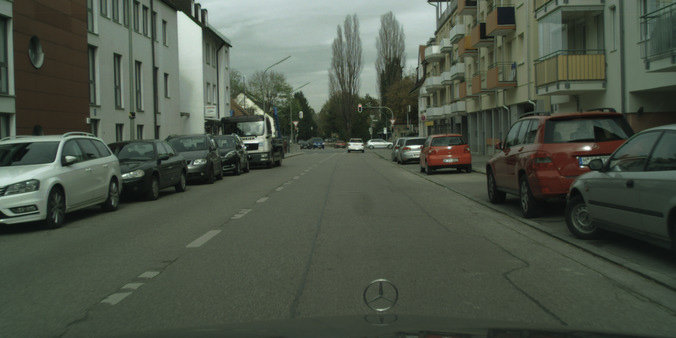

In [41]:
image

In [46]:
image_processor.post_process_panoptic_segmentation(outputs)[0]['segments_info']

`label_ids_to_fuse` unset. No instance will be fused.


[{'id': 1, 'label_id': 1, 'was_fused': False, 'score': 0.820588},
 {'id': 2, 'label_id': 13, 'was_fused': False, 'score': 0.995518},
 {'id': 3, 'label_id': 8, 'was_fused': False, 'score': 0.999905},
 {'id': 4, 'label_id': 13, 'was_fused': False, 'score': 0.963565},
 {'id': 5, 'label_id': 13, 'was_fused': False, 'score': 0.99988},
 {'id': 6, 'label_id': 13, 'was_fused': False, 'score': 0.99594},
 {'id': 7, 'label_id': 13, 'was_fused': False, 'score': 0.954949},
 {'id': 8, 'label_id': 13, 'was_fused': False, 'score': 0.886251},
 {'id': 9, 'label_id': 13, 'was_fused': False, 'score': 0.999925},
 {'id': 10, 'label_id': 13, 'was_fused': False, 'score': 0.853754},
 {'id': 11, 'label_id': 13, 'was_fused': False, 'score': 0.992315},
 {'id': 12, 'label_id': 13, 'was_fused': False, 'score': 0.999928},
 {'id': 13, 'label_id': 0, 'was_fused': False, 'score': 0.999988},
 {'id': 14, 'label_id': 7, 'was_fused': False, 'score': 0.760725},
 {'id': 15, 'label_id': 2, 'was_fused': False, 'score': 0.99994

In [47]:
image = Image.open("young-man-standing-and-leaning-on-car.jpg")
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

# Model predicts class_queries_logits of shape `(batch_size, num_queries)`
# and masks_queries_logits of shape `(batch_size, num_queries, height, width)`
class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

# Perform post-processing to get panoptic segmentation map
pred_panoptic_map = image_processor.post_process_panoptic_segmentation(
    outputs, target_sizes=[image.size[::-1]]
)[0]["segmentation"]
print(pred_panoptic_map.shape)

`label_ids_to_fuse` unset. No instance will be fused.


torch.Size([1455, 970])


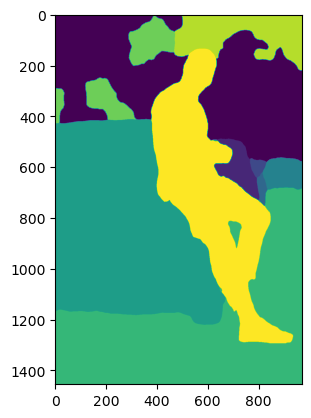

In [67]:
plt.imshow(pred_panoptic_map)

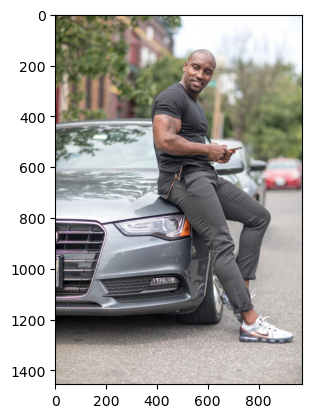

In [50]:
plt.imshow(image)

In [54]:
result = image_processor.post_process_panoptic_segmentation(
    outputs, target_sizes=[image.size[::-1]]
)
result[0]['segments_info']

`label_ids_to_fuse` unset. No instance will be fused.


[{'id': 1, 'label_id': 8, 'was_fused': False, 'score': 0.99985},
 {'id': 2, 'label_id': 13, 'was_fused': False, 'score': 0.980473},
 {'id': 3, 'label_id': 13, 'was_fused': False, 'score': 0.941208},
 {'id': 4, 'label_id': 5, 'was_fused': False, 'score': 0.631049},
 {'id': 5, 'label_id': 13, 'was_fused': False, 'score': 0.996826},
 {'id': 6, 'label_id': 13, 'was_fused': False, 'score': 0.999971},
 {'id': 7, 'label_id': 0, 'was_fused': False, 'score': 0.999871},
 {'id': 8, 'label_id': 2, 'was_fused': False, 'score': 0.999278},
 {'id': 9, 'label_id': 10, 'was_fused': False, 'score': 0.999089},
 {'id': 10, 'label_id': 11, 'was_fused': False, 'score': 0.998723}]

In [69]:
id2label =  {
    "0": "road",
    "1": "sidewalk",
    "2": "building",
    "3": "wall",
    "4": "fence",
    "5": "pole",
    "6": "traffic light",
    "7": "traffic sign",
    "8": "vegetation",
    "9": "terrain",
    "10": "sky",
    "11": "person",
    "12": "rider",
    "13": "car",
    "14": "truck",
    "15": "bus",
    "16": "train",
    "17": "motorcycle",
    "18": "bicycle"
  },